# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1375 Андерсон Алексей. Вариант №2

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения 
Регрессионная модель: $\mathbb{E}_{\theta}(Y|z)=f_{\theta}(z)$,  где $Y$ - наблюдения, $z$ - ковариата

Линейная регрессионная модель: $\mathbb{E}_{\theta}(Y|z)=x(z)^\intercal\beta$, где $\beta$ - вектор параметров регрессии, a $x(z)$ - вектор регрессоров

Статистическая модель: $\mathbb{E}_{\theta}(Y|z)=X^\intercal\beta$, $Var(Y|z) = \sigma^2E$

Альтернативная форма записи модели линейной регрессии: $Y = X^\intercal\beta + \varepsilon, \mathbb{E}_{\theta}\varepsilon = 0, Var_{\theta}\varepsilon = \sigma^2E$, где $\varepsilon$ - вектор ошибок

Метод наименьших квадратов: $RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to \min_\beta$

Нормальные уравнения: $XX^\intercal\beta=XY$

Решение системы нормальных уравнений в регулярном случае: $\hat{\beta}=(XX^\intercal)^{-1}XY$

##### Оценка параметра $\sigma^2$

$S^2 =\frac{SS_e}{n-r} =\frac{RSS(\hat{\beta})}{n-r}$, где $r = rank X, S^2$ - несмещенная оценка дисперсии

##### Линейная функция параметра

$\psi(\beta) = C^\intercal\beta$

$\psi(\beta)$ допускает несмещенное оценивание, если $\exists L(Y) = B Y : \forall \beta : \mathbb{E}_\beta L(Y) = C^\intercal\beta$, где $C$ - матрица $m \times q$, $q$ - длина функции параметра


##### Предположения

Классическое предположение: $ Y \sim \mathcal{N}(X^\intercal\beta,\sigma^2E) $

Эквивалентное предположение об остатках:  $ \varepsilon \sim \mathcal{N}(0,\sigma^2E) $

##### Доверительный интервал

ДНО - функция: $\psi(\beta) = C^\intercal\beta$

МНК оценка: $\hat{\psi}= C^\intercal\hat{\beta}$

$b_\psi = C^\intercal(XX^\intercal)^{-1}C$

Распределение: $\hat{\psi} \sim \mathcal{N}(\psi,\sigma^2b_\psi) $

Тогда $\frac{\hat{\psi} - {\psi}}{S\sqrt{b_\psi}} \sim S_{n-r}$

Доверительный интервал: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$, где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

##### Доверительный эллипсоид

$b_\psi = C^\intercal(XX^\intercal)^{-1}C$

Распределение: $\frac{\left(\hat{\psi} - {\psi}\right)^\intercal {b_\psi}^{-1} \left(\hat{\psi} - {\psi}\right)}{qS^2} \sim \mathcal{F}_{q,n-r}$

Доверительный эллипсоид: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,где $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

##### Проверка гипотез

Основная гипотеза $H_0:\psi=0$

Статистика: $\mathbb{F} = \frac{SS_H/q}{SS_e/(n-r)}$, где $SS_H = RSS(\hat{\beta}_H) - RSS(\hat{\beta})$, где $\hat{\beta}_H$ - МНК оценка при выполнении основной гипотезы

$\mathbb{F} \sim \mathcal{F}_{q,n-r}$

$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

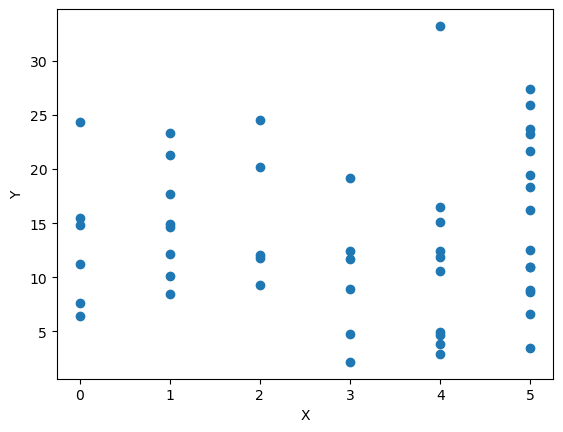

In [228]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import sympy
from sympy.solvers.solveset import nonlinsolve

Y = np.array([6.57, 8.60, 11.77, 15.11, 4.68, 16.21, 8.45, 4.72, 6.45, 14.92, 2.18, 12.46, 18.31, 23.37,
     8.96, 14.64, 24.32, 11.20, 23.75, 15.45, 3.43, 11.84, 8.80, 9.31, 2.89, 7.66, 23.25, 12.04,
     12.56, 3.87, 10.92, 27.39, 20.19, 12.14, 24.51, 12.44, 17.66, 33.23, 21.70, 25.88, 21.27, 19.44,
     14.85, 11.73, 10.98, 10.10, 16.54, 4.98, 10.61, 19.17])
X = np.array([5, 5, 2, 4, 4, 5, 1, 3, 0, 1, 3, 4, 5, 1, 3, 1, 0, 0, 5, 0, 5, 4, 5, 2, 4,
     0, 5, 2, 5, 4, 5, 5, 2, 1, 2, 3, 1, 4, 5, 5, 1, 5, 0, 3, 5, 1, 4, 4, 4, 3])
alpha = 0.2
h = 2.7

fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

##### Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$

$Y = \beta_0 + \beta_1 X + \varepsilon$

##### МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$:

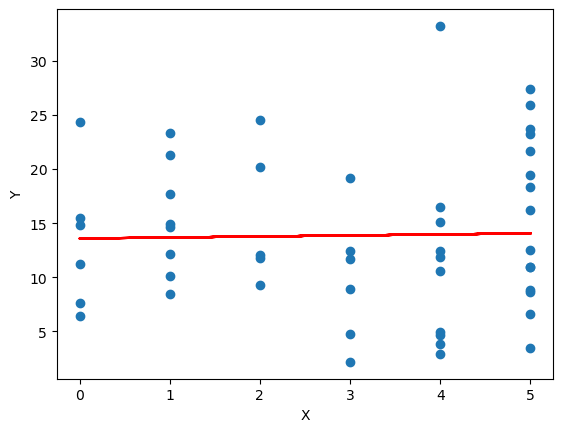

Определитель X * X^T: 8049.00
Оценка (beta_0): 13.58
Оценка (beta_1): 0.09


In [229]:
#matrix
Y_matrix = np.matrix(Y).T
X_matrix = np.matrix([[1] * len(X), X])

#determinant of X * X^T
determinant_X_XT = np.linalg.det(X_matrix * X_matrix.T)

#least squares solution
Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix

# Obtained estimates
beta_0 = float(Beta_matrix[0])
beta_1 = float(Beta_matrix[1])

#regression line
regression_line = beta_0 + beta_1 * X

#data and regression line
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.plot(X, regression_line, color='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

print(f'Определитель X * X^T: {determinant_X_XT:.2f}')
print(f'Оценка (beta_0): {beta_0:.2f}')
print(f'Оценка (beta_1): {beta_1:.2f}')



Построенная модель линейной регрессии не соответствует заданным данным

### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

In [230]:

unbiased_variance = np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2/(len(X) - np.linalg.matrix_rank(X_matrix))

print(f'Несмещенная оценка дисперсии: {unbiased_variance:.2f}')


Несмещенная оценка дисперсии: 52.70


In [231]:
mean_errors = 0
std_errors = np.sqrt(unbiased_variance)

intervals = [[-10, -10+2*h], [-10+2*h, -10+4*h], [-10+4*h, -10+6*h], [-10+6*h, -10+8*h], [-10+8*h, -10+10*h]]
freq = [0] * len(intervals) 
freq_teor = [0] * len(intervals) 

print("Интервал         |   Фактическая частота   |   Теоретическая частота")
for i in range(len(intervals)):
    a, b = intervals[i]
    freq[i] += len([x for x in errors if (a <= x < b)])
    freq_teor[i] += len(errors) * (sps.norm.cdf(b, loc=mean_errors, scale=std_errors) - sps.norm.cdf(a, loc=mean_errors, scale=std_errors))
    if i == len(intervals) - 1:
        freq_teor[i] += len(errors) * sps.norm.sf(b, loc=mean_errors, scale=std_errors)
    print(f'[{round(a, 1)}, {round(b, 1)})\t\t {freq[i]}\t\t {freq_teor[i]}')

freq = np.array(freq)
freq_teor = np.array(freq_teor)
chi_square = np.sum((freq - freq_teor) ** 2 / freq_teor)
critical_value = sps.chi2.ppf(1 - alpha, df=len(freq) - 1)

print("\nСтатистика хи-квадрат:", chi_square)
print("xi^2:", critical_value)

if chi_square > critical_value:
    print("Гипотеза о нормальности отклоняется")
else:
    print("Нет оснований отклонить гипотезу о нормальности")

Интервал         |   Фактическая частота   |   Теоретическая частота
[-10, -4.6)		 10		 8.948798219759107
[-4.6, 0.8)		 14		 14.036398574858202
[0.8, 6.2)		 11		 12.979644290797127
[6.2, 11.6)		 8		 7.075207657997851
[11.6, 17.0)		 2		 2.7513474748177447

Статистика хи-квадрат: 0.7515702490805343
xi^2: 5.9886166940042465
Нет оснований отклонить гипотезу о нормальности


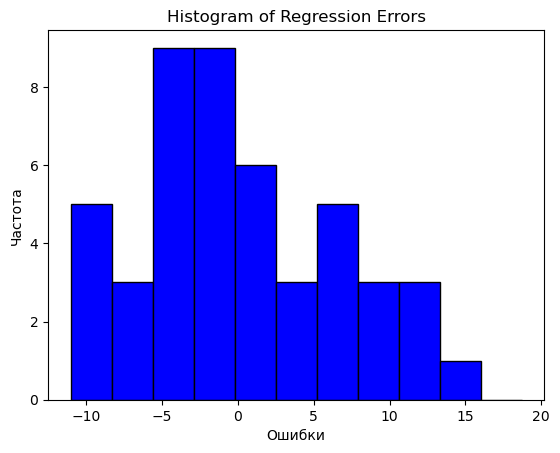

In [232]:
# Вычисление ошибок регрессии
errors = Y_matrix - X_matrix.T * Beta_matrix

# Построение гистограммы
plt.hist(errors, bins=[x / 10.0 for x in range(int(min(errors)) * 10, int(max(errors)) * 10 + 5, int(h * 10))], color='blue', edgecolor='black')
plt.title('Histogram of Regression Errors')
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.show()


Визуально оценивая распределение нельзя сказать что это нормальное распределение, но также нельзя отрицать что при изменении некоторых факторов, таких как выборка это распределение может стать нормальным

### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

In [233]:
from scipy.stats import t
r = np.linalg.matrix_rank(X_matrix)

x_alpha = sps.t.ppf(1 - alpha/2, df = len(X) - r)
C = np.matrix([[1], [0]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
confidence_interval_beta_0 = [beta_0 - x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi), beta_0 + x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi)]


C = np.matrix([[0], [1]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
confidence_interval_beta_1 = [beta_1 - x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi), beta_1 + x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi)]

# Доверительный эллипс
covariance_matrix = unbiased_variance / np.sum((np.array(X) - np.mean(X)) ** 2) * np.array([[np.sum(np.array(X) ** 2) / n, -np.mean(X) * np.sum(np.array(X))],[-np.mean(X) * np.sum(np.array(X)), np.sum(np.array(X) ** 2)]])
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
semi_axes = np.sqrt(np.abs(chi2.ppf(1 - alpha, df=2) * eigenvalues))


# Вывод результатов
print(f'Доверительный интервал для beta_0: {confidence_interval_beta_0}')
print(f'Доверительный интервал для beta_1: {confidence_interval_beta_1}')
print(f"Полуоси доверительного эллипса: {semi_axes}")



Доверительный интервал для beta_0: [10.972966558361968, 16.19635136933091]
Доверительный интервал для beta_1: [-0.6489879207748248, 0.8379554943864564]
Полуоси доверительного эллипса: [15.65093577 30.13459975]


### 4. Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости.

Основная гипотеза: $H_0 : \psi = 0$

In [234]:

beta_0_h = sum(Y)/len(Y)
beta_1_h = 0

Beta_h_matrix = np.matrix([[beta_0_h], [beta_1_h]])
F_statistic = (np.linalg.norm(Y_matrix - X_matrix.T * Beta_h_matrix)**2 - np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2)/2/unbiased_variance

print(f'Оценка вектора beta: ({beta_0_h}, {beta_1_h})')
print(f'Статистика F: {F_statistic}')
print(f'x-alpha: {sps.f.ppf(1 - alpha, dfn = 2, dfd = len(X) - r)}')

if F_statistic > alpha:
    print("Гипотеза отвергается")
else:
    print("Нет оснований отвергнуть гипотезу")


Оценка вектора beta: (13.870000000000003, 0)
Статистика F: 0.013635385051969722
x-alpha: 1.6646290755148478
Нет оснований отвергнуть гипотезу


### 5.  Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Оценка вектора beta: [15.3617474  -2.39243562  0.46461979]


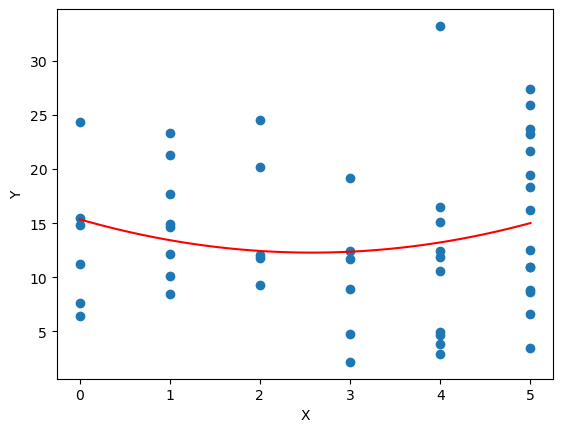

dfc: [[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1]
 [ 5  5  2  4  4  5  1  3  0  1  3  4  5  1  3  1  0  0  5  0  5  4  5  2
   4  0  5  2  5  4  5  5  2  1  2  3  1  4  5  5  1  5  0  3  5  1  4  4
   4  3]
 [25 25  4 16 16 25  1  9  0  1  9 16 25  1  9  1  0  0 25  0 25 16 25  4
  16  0 25  4 25 16 25 25  4  1  4  9  1 16 25 25  1 25  0  9 25  1 16 16
  16  9]] 1.2994388784066297


In [236]:
#матрица X с дополнительным членом X^2
X_matrix = np.matrix([[1] * len(X), X, [x**2 for x in X]])
Y_matrix = np.matrix(Y).T

#МНК оценок
Beta_matrix = np.linalg.inv(X_matrix * X_matrix.T) * X_matrix * Y_matrix
beta_0 = float(Beta_matrix[0])
beta_1 = float(Beta_matrix[1])
beta_2 = float(Beta_matrix[2])
print(f'Оценка вектора beta: {beta_new}')

X_range = np.linspace(min(X), max(X), 100)
Y_predicted = [beta_0 + beta_1 * x + beta_2 * x**2 for x in X_range]

plt.scatter(X, Y)
plt.plot(X_range, Y_predicted, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



### 6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

In [237]:

unbiased_variance = np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2/(len(X) - np.linalg.matrix_rank(X_matrix))

print(f'Несмещенная оценка дисперсии: {unbiased_variance:.2f}')


Несмещенная оценка дисперсии: 52.52


In [238]:
mean_errors = 0
std_errors = np.sqrt(unbiased_variance)

intervals = [[-10, -10+2*h], [-10+2*h, -10+4*h], [-10+4*h, -10+6*h], [-10+6*h, -10+8*h], [-10+8*h, -10+10*h]]
freq = [0] * len(intervals) 
freq_teor = [0] * len(intervals) 

print("Интервал         |   Фактическая частота   |   Теоретическая частота")
for i in range(len(intervals)):
    a, b = intervals[i]
    freq[i] += len([x for x in errors if (a <= x < b)])
    freq_teor[i] += len(errors) * (sps.norm.cdf(b, loc=mean_errors, scale=std_errors) - sps.norm.cdf(a, loc=mean_errors, scale=std_errors))
    if i == len(intervals) - 1:
        freq_teor[i] += len(errors) * sps.norm.sf(b, loc=mean_errors, scale=std_errors)
    print(f'[{round(a, 1)}, {round(b, 1)})\t\t {freq[i]}\t\t {freq_teor[i]}')

freq = np.array(freq)
freq_teor = np.array(freq_teor)
chi_square = np.sum((freq - freq_teor) ** 2 / freq_teor)
critical_value = sps.chi2.ppf(1 - alpha, df=len(freq) - 1)
print("\nСтатистика хи-квадрат:", freq)
print("\nСтатистика хи-квадрат:", chi_square)
print("xi^2:", critical_value)

if chi_square > critical_value:
    print("Гипотеза о нормальности отклоняется")
else:
    print("Нет оснований отклонить гипотезу о нормальности")

Интервал         |   Фактическая частота   |   Теоретическая частота
[-10, -4.6)		 10		 8.949283967715022
[-4.6, 0.8)		 14		 14.057731176552815
[0.8, 6.2)		 11		 12.996062882470572
[6.2, 11.6)		 8		 7.070181287883454
[11.6, 17.0)		 2		 2.736233042838707

Статистика хи-квадрат: [10 14 11  8  2]

Статистика хи-квадрат: 0.7505541153319146
xi^2: 5.9886166940042465
Нет оснований отклонить гипотезу о нормальности


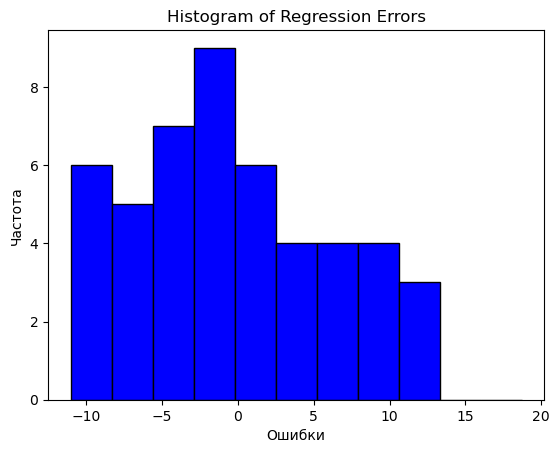

dfc: [[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1]
 [ 5  5  2  4  4  5  1  3  0  1  3  4  5  1  3  1  0  0  5  0  5  4  5  2
   4  0  5  2  5  4  5  5  2  1  2  3  1  4  5  5  1  5  0  3  5  1  4  4
   4  3]
 [25 25  4 16 16 25  1  9  0  1  9 16 25  1  9  1  0  0 25  0 25 16 25  4
  16  0 25  4 25 16 25 25  4  1  4  9  1 16 25 25  1 25  0  9 25  1 16 16
  16  9]] 1.2994388784066297


In [239]:
# Вычисление ошибок регрессии
errors = Y_matrix - X_matrix.T * Beta_matrix

# Построение гистограммы
plt.hist(errors, bins=[x / 10.0 for x in range(int(min(errors)) * 10, int(max(errors)) * 10 + 5, int(h * 10))], color='blue', edgecolor='black')
plt.title('Histogram of Regression Errors')
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.show()




Визуально оценивая распределение ошибок можно сказать что используя дополнительный член с $X^2$, распределение больше похоже на нормальное нежели в п.2

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0, \beta_1, \beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$

In [256]:
r = np.linalg.matrix_rank(X_matrix)

x_alpha = sps.t.ppf(1 - alpha/2, df = n - r)
C = np.matrix([[1], [0], [0]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
confidence_interval_beta_0 = [beta_0 - x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi), beta_0 + x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi)]

C = np.matrix([[0], [1], [0]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
confidence_interval_beta_1 = [beta_0 - x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi), beta_0 + x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi)]

C = np.matrix([[0], [0], [1]])
b_psi = float(C.T * np.linalg.inv(X_matrix * X_matrix.T) * C)
confidence_interval_beta_2 = [beta_0 - x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi), beta_0 + x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi)]


# Доверительный эллипс
semi_axes = np.sqrt(np.diag(cov_matrix))

# Вывод результатов
print(f'Доверительный интервал для beta_0: {confidence_interval_beta_0}')
print(f'Доверительный интервал для beta_1: {confidence_interval_beta_1}')
print(f'Доверительный интервал для beta_2: {confidence_interval_beta_2}')
print(f"Уравнение доверительного эллипсоида: x^2/{semi_axes[0]**2} + y^2/{semi_axes[1]**2} = 1")




Доверительный интервал для beta_0: [11.987294126535621, 18.736200665295545]
Доверительный интервал для beta_1: [12.274545369010879, 18.448949422820288]
Доверительный интервал для beta_2: [14.80190613285896, 15.921588658972208]
Уравнение доверительного эллипсоида: x^2/4.039543967389468 + y^2/0.32735364403480294 = 1


### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить её значимость на уровне $\alpha$.


In [270]:
X_matrix_h = np.matrix([[1] * len(X), X]) 

Beta_h_matrix = np.linalg.inv(X_matrix_h * X_matrix_h.T) * X_matrix_h * Y_matrix


beta_0_h = float(Beta_h_matrix[0])
beta_1_h = float(Beta_h_matrix[1])
beta_2_h = 0

Beta_h_matrix = np.matrix([[beta_0_h], [beta_1_h], [beta_2_h]])

# Расчет статистики F
F_statistic = (np.linalg.norm(Y_matrix - X_matrix.T * Beta_h_matrix)**2 - np.linalg.norm(Y_matrix - X_matrix.T * Beta_matrix)**2)/len(Beta_matrix)/unbiased_variance
# Вывод результатов
print(f'Оценка вектора beta для модели с X: ({beta_0_h}, {beta_1_h}, {beta_2_h})')
print(f'Статистика F: {F_statistic}')
print(f'x_alpha: {sps.f.ppf(1 - alpha, dfn=2, dfd=len(X) - 3)}')

# Проверка гипотезы
if F_statistic > sps.f.ppf(1 - alpha, dfn=2, dfd=len(X) - 3):
    print("Гипотеза отвергается")
else:
    print("Нет оснований отвергнуть гипотезу")    


Оценка вектора beta для модели с X: (13.584658963846438, 0.09448378680581582, 0)
Статистика F: 0.3878949054522534
x_alpha: 1.6658304737978833
Нет оснований отвергнуть гипотезу


## Выводы

В ходе практической работы были изучены основы линейной регрессии и метода наименьших квадратов (МНК). Построены модели линейной и квадратичной зависимостей между переменными X и Y, а также проведена проверка нормальности ошибок. Анализ показал, что квадратичная зависимость может лучше аппроксимировать данные. Однако, результаты проверок гипотез не всегда были однозначными. Построены доверительные интервалы и эллипсоиды для параметров моделей